### 1. Data Importing and Pre-processing
#### **Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used**

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [272]:
#pwd #checking primary working directory

In [273]:
#import the file using pandas reader
df=pd.read_csv('online_shoppers_intention.csv', header=0)

In [274]:
#read column headers, data types, and data shape
#df.head(5)

In [275]:
#reading the data types
#df.dtypes

#counts
#print('Number of rows in data set:',df.shape[0])
#print('Number of columns in data set:',df.shape[1])

#### **Clean, wrangle, and handle missing data**

In [276]:
#identify amount of NA data by column
#print(df.isnull().sum())

In [277]:
#Investigating the informational column first. Hypothesis is that Informational and Informational_Duration are connected in that 
#Informational is a categorical variable and Informational_Duration provides the time spent on an informational page. Therefore, if
#Informational_Duration = 0, Informational should equal 0. If they are not 0, may need to replace with mode. 
#First, look at the null values of informational column: 
#df_info_null=df[df['Informational'].isnull()]
#df_infodur_0=df_info_null['Informational_Duration']
#df_infodur_0.value_counts()

In [278]:
#Seeing here that null values for Informational do span both 0 and non-zero Info_Duration values. Investigating 0 values next:
#filter the data frame for just Info = 0 values
#df_infodur_0=df[df['Informational_Duration']==0]

In [279]:
#info_value0=df_infodur_0['Informational']

In [280]:
#find the unique values and their counts of Informational when Info_Duration = 0
#info_value0.value_counts()

In [281]:
#Investigating the other direction: when Informational = 0, are their non-0 values of Info_Duration?
#df_info0=df[df['Informational']==0]
#info_dur0=df_info0['Informational_Duration']
#info_dur0.value_counts()

In [282]:
df_info_not0=df[df['Informational_Duration']>0] #create a dataframe of rows with non-zero Info_Duration 
info_mode_not0=df_info_not0['Informational'].mode() #find the mode of this dataframe
info_mode_not0

0   1.0000
Name: Informational, dtype: float64

In [283]:
#Given the above infomation, the vast majority of Info and Info_Duration 0/0 values and the non-zero mode of 1, 
#concluding that it is best to fill with differing mode values depending on the Informational_Duration column
#i.e: if Informational Duration = 0, fill NaN values with 0 (mode). if Informational Duration >0, fill NaN values with 1 (non zero mode)

In [284]:
#locate the lines where Informational is null and Info_Duration is 0:
df_info_00=df.loc[(df['Informational'].isnull())&(df['Informational_Duration']==0)]

In [285]:
#df_info_00.head(5) #checking

In [286]:
#fill only null informational values with 0 (mode) if Info Duration is 0
df.loc[(df['Informational_Duration']==0) & (df['Informational'].isna()), 'Informational']=0

In [287]:
#check to see this filled some null values
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational               24
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [288]:
#fill rest of informational values with non-0 (mode) if Info Duration is >0 (see variable info_mode_not0)
df.loc[(df['Informational_Duration']>0) & (df['Informational'].isna()), 'Informational']= 1

In [289]:
#check to see this filled the null values
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [290]:
#next, investigating Page Values for filling NA:
#df['PageValues'].nunique()

In [291]:
#There are 2,681 unique values with Page Values. According to the notes on the data, "The "Page Value" feature represents the average 
#value for a web page that a user visited before completing an e-commerce transaction." 
#We do not know how "value" was determined. Opting to fill with mode given the column representation is unknown
df['PageValues'].mode()

0   0.0000
Name: PageValues, dtype: float64

In [292]:
#checking to see if a dual mode makes sense for this column as well - if Revenue is False, is PageValue 0?
#rev_false=df[df['Revenue']==False]
#rev_false['PageValues'].nunique()
#no - Page Value can still have 1183 different values if Rev=False. Continuing with applying mode for full column

In [293]:
#checking how many rows have a zero value for PageValues
#len(df[df['PageValues']==0])

In [294]:
#fill null PageValues with 0
df.loc[df['PageValues'].isna(), 'PageValues']= 0

In [295]:
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [296]:
#df.head(5)

In [297]:
#see how many unique values and their respective value counts exist for OperatingSystems
#df['OperatingSystems'].value_counts()

In [298]:
#see how many unique values and their respective value counts exist for OperatingSystems
#df['Browser'].value_counts()

In [299]:
#understand if there is a correlation between Operating System and Browser
#correlation = df['OperatingSystems'].corr(df['Browser'])

In [300]:
#correlation

In [301]:
#too weak of a correlation, will use mode for Operating system as well
df['OperatingSystems'].mode()

0   2.0000
Name: OperatingSystems, dtype: float64

In [302]:
#Filling Operating Sysem NAs with mode
df.loc[df['OperatingSystems'].isna(), 'OperatingSystems']= 2.0

In [303]:
#checking to see all NAs are filled 
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### **Transform data appropriately using techniques such as aggregation, normalization, and feature construction**

In [304]:
#combine _duration columns (aggregation)
df['Total_Duration'] = (
    df['Administrative_Duration']+
    df['Informational_Duration']+
    df['ProductRelated_Duration']
)

In [305]:
# z scaling (normalization)
standard_cols = ['BounceRates', 'ExitRates', 'PageValues']

means=df[standard_cols].mean()
stds=df[standard_cols].std(ddof=0)  # ddof=0 matches sklearn's StandardScaler

#apply Z-score scaling: (x - mean) / std
df[standard_cols] = (df[standard_cols] - means) / stds

#verify Z-scaling
check = pd.DataFrame({
    'mean': df[standard_cols].mean(),
    'std': df[standard_cols].std(ddof=0)
})
check

,mean,std
BounceRates,0.0000,1.0000
ExitRates,-0.0000,1.0000
PageValues,0.0000,1.0000


In [306]:
#feature construction: engagement level

#classify engagement level based on newly aggregated total duration value
df['Engagement_Level'] = pd.cut(
    df['Total_Duration'],
    bins=[0,60,300,1200, df['Total_Duration'].max()],
    labels=['Very Low', 'Low', 'Medium', 'High'],
    include_lowest=True
)

In [307]:
#feature construction: special purchase
print(df['SpecialDay'].unique())
#if special day >0 & Revenue = true, special purchase will be true

[0.  0.4 0.8 1.  0.2 0.6]


In [308]:
def SpecialPurpose(row):
    if row['Revenue'] == True and row['SpecialDay'] >0:
        return True
    else:
        return False

In [309]:
df['SpecialPurchase'] = df.apply(SpecialPurpose, axis=1)

In [310]:
df.head(3) #checking column additionss

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Engagement_Level,SpecialPurchase
0,0,0.0000,0.0000,0.0000,1,0.0000,3.6672,3.2293,-0.3154,0.0000,...,1.0000,1,1,1,Returning_Visitor,False,False,0.0000,Very Low,False
1,0,0.0000,0.0000,0.0000,2,64.0000,-0.4577,1.1715,-0.3154,0.0000,...,2.0000,2,1,2,Returning_Visitor,False,False,64.0000,Low,False
2,0,0.0000,0.0000,0.0000,1,0.0000,3.6672,3.2293,-0.3154,0.0000,...,4.0000,1,9,3,Returning_Visitor,False,False,0.0000,Very Low,False


#### **Reduce redundant data and perform need-based discretization**

In [311]:
#considering eliminating "PageValue"
#about page value: The "Page Value" feature represents the average value for a web page 
#that a user visited before completing an e-commerce transaction. 

In [312]:
#print(df['PageValues'].value_counts())
df['PageValues'].nunique()
#print(df['Revenue'].value_counts())
#PageValues, without the key, is not providing usable information without knowing more about the page valuations. Will remove for this analysis

2681

In [313]:
#df_rev=df['PageValues'].nunique()

In [314]:
#df.head(3)

In [315]:
#Similarly, Operating System and Browser are not relevant at this point

In [316]:
df['Administrative'].unique()
df_admin0=df[df['Administrative_Duration']>0]
df_admin0['Administrative'].unique()
#if administrative_duration is 0, administrative is also 0. Without information on the 
#page categories value, this information is duplicative

array([ 2,  4,  1, 12,  3, 10,  6,  5,  9,  8, 16, 13, 11,  7, 18, 14, 17,
       19, 15, 24, 22, 21, 20, 23, 27, 26])

In [317]:
df['Informational'].unique()
df_info0=df[df['Informational_Duration']>0]
df_info0['Informational'].unique()
#same situation as administrative

array([ 2.,  1.,  4., 16.,  5.,  3., 14.,  6., 12.,  7.,  9., 10.,  8.,
       11., 24., 13.])

In [318]:
df['ProductRelated'].unique()
df_product0 = df[df['ProductRelated_Duration']>0]
df_product0['ProductRelated'].unique()
#found that the same information is told but Product_Duration=0 is coded to Product=1 (instead of 0 like the other columns) 
#Without knowing the product coding for this categorical column I would also delete as it is duplicative

array([  2,  10,  19,   3,  16,   7,   6,  23,  13,  20,   8,   5,  32,
         4,  45,  14,  52,   9,  46,  15,  22,  11,  12,  36,  42,  27,
        90,  18,  38,  17, 128,  25,  30,  21,  51,  26,  28,  31,  24,
        50,  96,  49,  68,  98,  67,  55,  35,  37,  29,  34,  71,  63,
        87,  40,  33,   1,  54,  64,  75,  39, 111,  81,  61,  47,  44,
        88, 149,  41,  79,  66,  43, 258,  80,  62,  83, 173,  48,  58,
        57,  56,  69,  82,  59, 109, 287,  53,  84,  78, 137, 113,  89,
        65,  60, 104, 129,  77,  74,  93,  76,  72, 194, 140, 110, 132,
       115,  73, 328, 160,  86, 150,  95, 130, 151, 117, 124, 127, 125,
       116, 105,  92, 157, 154, 220, 187, 112, 131, 159,  94, 204, 142,
       206, 102, 313, 145,  85,  97, 198, 181, 126, 106, 101, 108, 119,
        70, 122,  91, 276, 100, 291, 114, 172, 217, 141, 133, 156, 136,
       180, 135, 195,  99, 362, 179, 118, 175, 148, 440, 103, 178, 184,
       705, 134, 176, 146, 189, 120, 193, 222, 121, 107, 305, 19

In [319]:
#drop columns that were decided not to have information necessary for the analysis
df_clean = df.drop(['PageValues','OperatingSystems','Browser','Administrative', 'Informational','ProductRelated'],axis='columns')
df_clean.head(2)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Engagement_Level,SpecialPurchase
0,0.0000,0.0000,0.0000,3.6672,3.2293,0.0000,Feb,1,1,Returning_Visitor,False,False,0.0000,Very Low,False
1,0.0000,0.0000,64.0000,-0.4577,1.1715,0.0000,Feb,1,2,Returning_Visitor,False,False,64.0000,Low,False


### 2. Data Analysis and Visualizations

#### **Identify categorical, ordinal, and numerical variables within the data**

In [320]:
#reviewing data types
df_clean.dtypes

Administrative_Duration     float64
Informational_Duration      float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
SpecialDay                  float64
Month                        object
Region                        int64
TrafficType                   int64
VisitorType                  object
Weekend                        bool
Revenue                        bool
Total_Duration              float64
Engagement_Level           category
SpecialPurchase                bool
dtype: object

In [321]:
#confirmed that all _Duration columns as well as BounceRates, ExitRates should be numerical
#Special Day should be recoded to categorical as it seems to be specifying a certain holiday based on the number/key
#Region is also categorical to a key
#understanding other columns: 
#"Traffic Type" column
df['TrafficType'].unique() #this looks to be a categorical variable to a key

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20])

In [322]:
#region and traffic type are both categorical variables. changing the data types to categorical
df_clean['Region']=df_clean['Region'].astype('category')
#df_clean.dtypes #checking

In [323]:
df_clean['TrafficType']=df_clean['TrafficType'].astype('category')
df_clean['SpecialDay']=df_clean['SpecialDay'].astype('category')
df_clean.dtypes

Administrative_Duration     float64
Informational_Duration      float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
SpecialDay                 category
Month                        object
Region                     category
TrafficType                category
VisitorType                  object
Weekend                        bool
Revenue                        bool
Total_Duration              float64
Engagement_Level           category
SpecialPurchase                bool
dtype: object

#### **Provide measures of centrality and distribution with visualizations**

In [324]:
import seaborn as sns

num_cols = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration',
    'Total_Duration'
    # leaving out exit rates and bounce rates as the z scaling creates plotting issues. They will still be used in correlation analysis and modeling but no need to plot them
]
#pd.set_option('display.float_format', '{:.4f}'.format)


df_clean[num_cols].describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,Total_Duration
count,12330.0000,12330.0000,12330.0000,12330.0000
mean,80.8186,34.4724,1194.7462,1310.0372
std,176.7791,140.7493,1913.6693,2037.8017
min,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,184.1375,222.0000
50%,7.5000,0.0000,598.9369,680.0000
75%,93.2562,0.0000,1464.1572,1626.9083
max,3398.7500,2549.3750,63973.5222,69921.6472


In [358]:
#df_clean[num_cols].hist(figsize=(12, 8), bins=30)
#plt.suptitle("Distributions of Numerical Features", fontsize=14)
#plt.tight_layout()
#plt.show()
#not the best viz method for this data. Tried boxplot next


In [357]:
#plt.figure(figsize=(12, 6))
#sns.boxplot(data=df_clean[num_cols])
#plt.title("Boxplots of Session Durations")

#plt.xlabel("Session Type")

#plt.ylabel("Seconds")

#plt.xticks(rotation=45)
#plt.show()
#clipped version in next cell


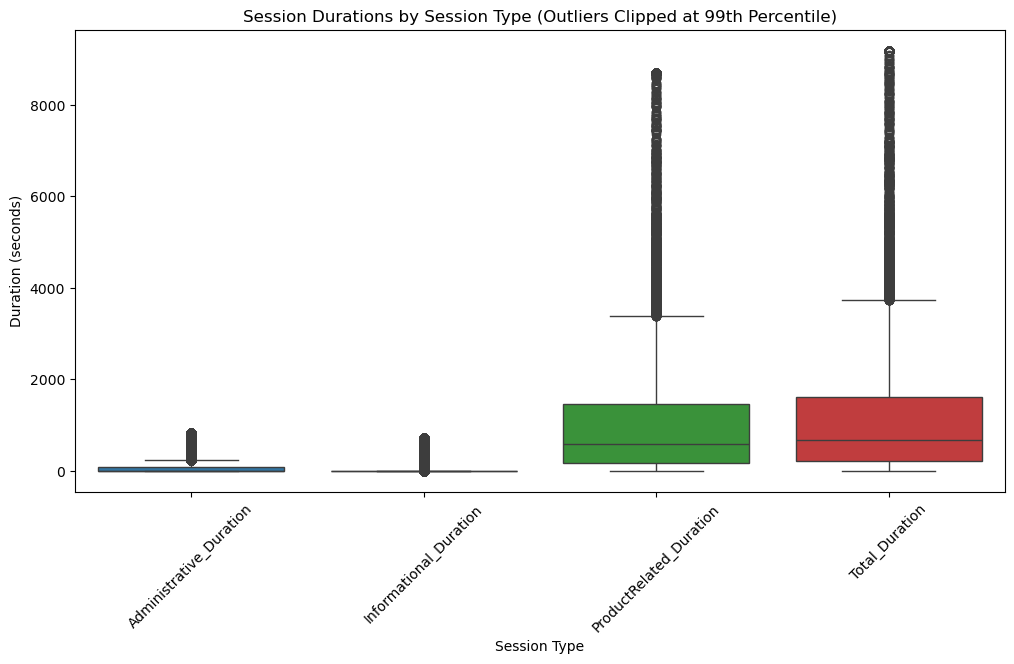

In [372]:
# Create a visualization-friendly copy
df_viz = df_clean.copy()

# Clip extreme outliers at the 99th percentile for each column
for col in num_cols:
    df_viz[col] = df_viz[col].clip(upper=df_clean[col].quantile(0.99))

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_viz[num_cols])
plt.title("Session Durations by Session Type (Outliers Clipped at 99th Percentile)")
plt.xlabel("Session Type")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=45)
plt.show()


#### **Diagnose for correlations between variables and determine independent and dependent variables**

In [345]:
corr = df_clean.corr(numeric_only=True)
corr


,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,Weekend,Revenue,Total_Duration,SpecialPurchase
Administrative_Duration,1.0000,0.2380,0.3554,-0.1442,-0.2058,0.0150,0.0936,0.4370,-0.0083
Informational_Duration,0.2380,1.0000,0.3474,-0.0741,-0.1053,0.0241,0.0703,0.4159,0.0171
ProductRelated_Duration,0.3554,0.3474,1.0000,-0.1845,-0.2520,0.0073,0.1524,0.9939,0.0041
BounceRates,-0.1442,-0.0741,-0.1845,1.0000,0.9130,-0.0465,-0.1507,-0.1909,-0.0253
ExitRates,-0.2058,-0.1053,-0.2520,0.9130,1.0000,-0.0626,-0.2071,-0.2618,-0.0354
Weekend,0.0150,0.0241,0.0073,-0.0465,-0.0626,1.0000,0.0293,0.0098,-0.0193
Revenue,0.0936,0.0703,0.1524,-0.1507,-0.2071,0.0293,1.0000,0.1561,0.1853
Total_Duration,0.4370,0.4159,0.9939,-0.1909,-0.2618,0.0098,0.1561,1.0000,0.0043
SpecialPurchase,-0.0083,0.0171,0.0041,-0.0253,-0.0354,-0.0193,0.1853,0.0043,1.0000


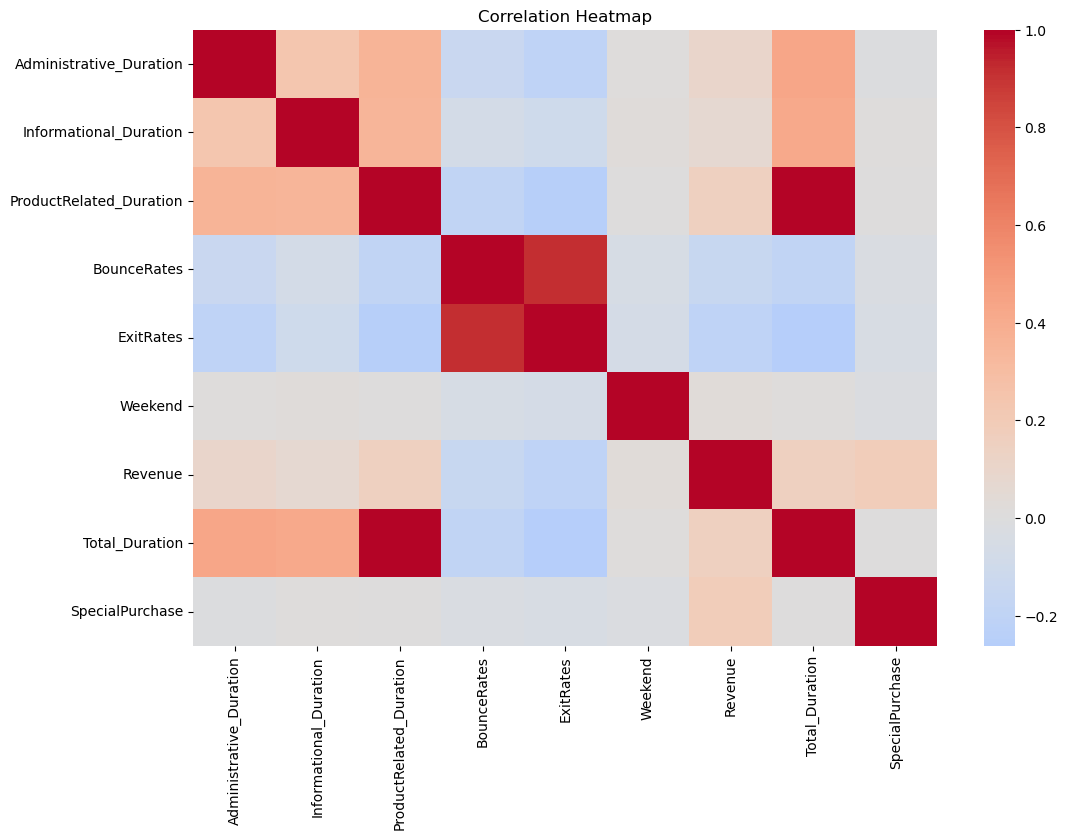

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False,cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#revenue is the dependent variable, the rest of the output are the independent variables
corr_with_revenue = corr['Revenue'].sort_values(ascending=False)
corr_with_revenue


Revenue                    1.0000
SpecialPurchase            0.1853
Total_Duration             0.1561
ProductRelated_Duration    0.1524
Administrative_Duration    0.0936
Informational_Duration     0.0703
Weekend                    0.0293
BounceRates               -0.1507
ExitRates                 -0.2071
Name: Revenue, dtype: float64

In [ ]:
#these are the independent variable with the strongest correlations
top_predictors = corr_with_revenue[abs(corr_with_revenue) > 0.1]
top_predictors

Revenue                    1.0000
SpecialPurchase            0.1853
Total_Duration             0.1561
ProductRelated_Duration    0.1524
BounceRates               -0.1507
ExitRates                 -0.2071
Name: Revenue, dtype: float64

#### **Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest**

In [328]:
#import seaborn as sns

<AxesSubplot: xlabel='Month', ylabel='count'>

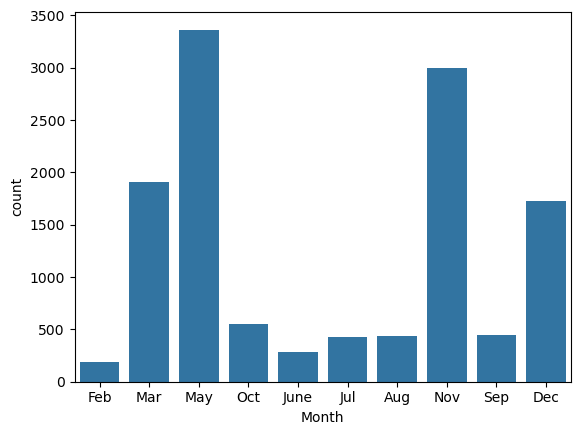

In [329]:
#Look at traffic (count of rows) by Month
sns.countplot(x='Month', data =df_clean)

<AxesSubplot: xlabel='Month', ylabel='count'>

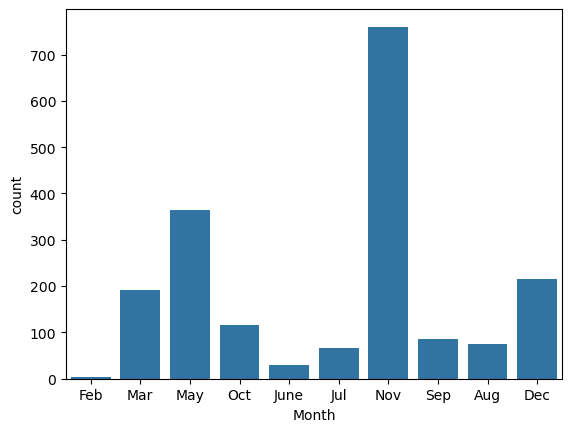

In [330]:
#subset data to only view when revenue is "true" i.e.: product sales:
df_rev=df[df['Revenue']==True]
#look at number of sales (Revenue = True) by month
sns.countplot(x='Month', data =df_rev)

<AxesSubplot: xlabel='Region', ylabel='count'>

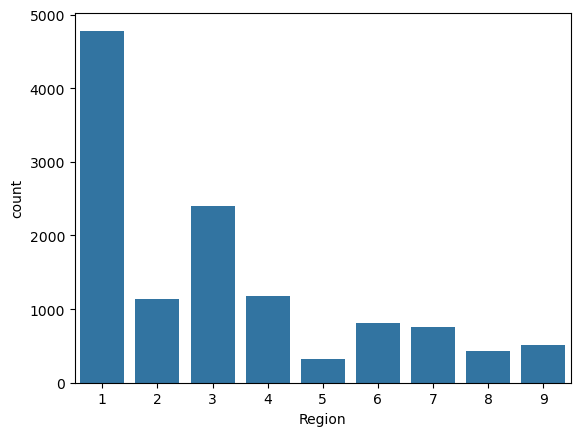

In [331]:
#traffic by region:
sns.countplot(x='Region', data =df)

<AxesSubplot: xlabel='Region', ylabel='count'>

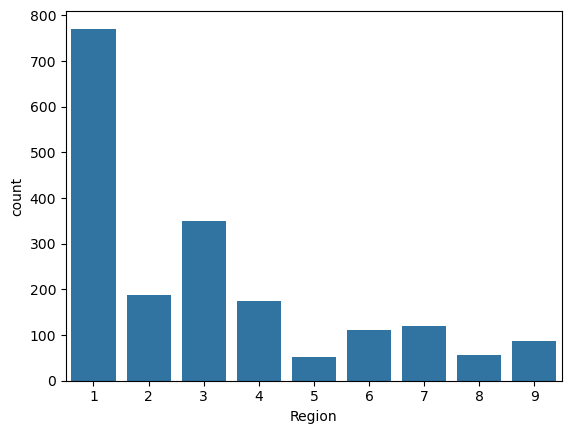

In [332]:
#look at number of sales by region
sns.countplot(x='Region', data =df_rev)

<AxesSubplot: xlabel='Weekend', ylabel='count'>

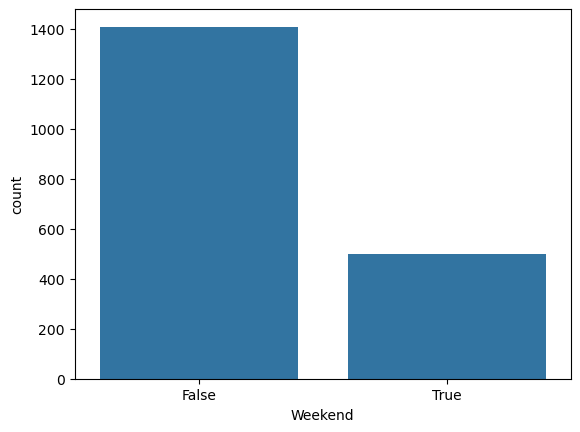

In [333]:
#understand if sales primarily occur on weekends or weekdays
sns.countplot(x='Weekend', data =df_rev)

<AxesSubplot: xlabel='Month', ylabel='count'>

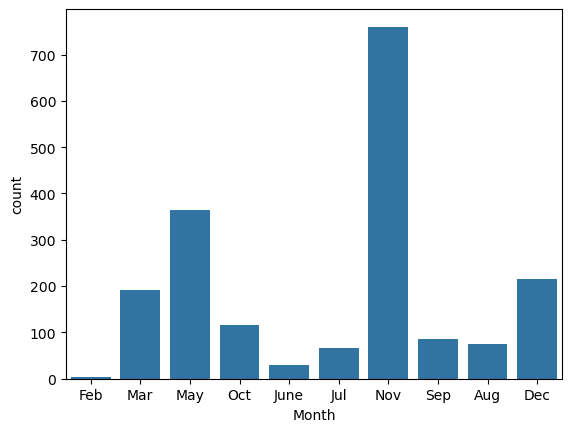

In [334]:
sns.countplot(x='Month', data =df_rev)

<AxesSubplot: xlabel='SpecialDay', ylabel='count'>

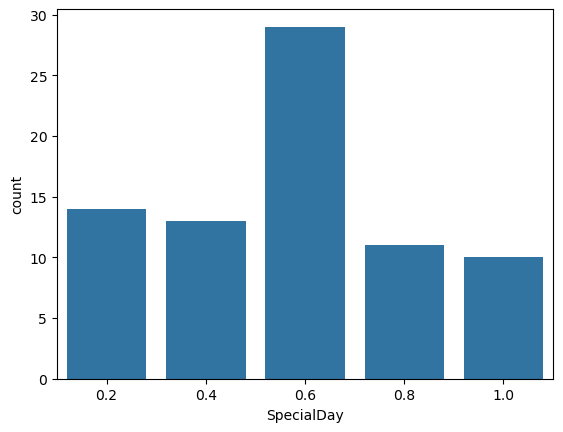

In [335]:
#See which holiday encourages the most sales
df['SpecialDay'].unique() 
df_rev_special=df_rev[df_rev['SpecialDay']>0]
sns.countplot(x='SpecialDay', data=df_rev_special)

<AxesSubplot: xlabel='SpecialPurchase', ylabel='count'>

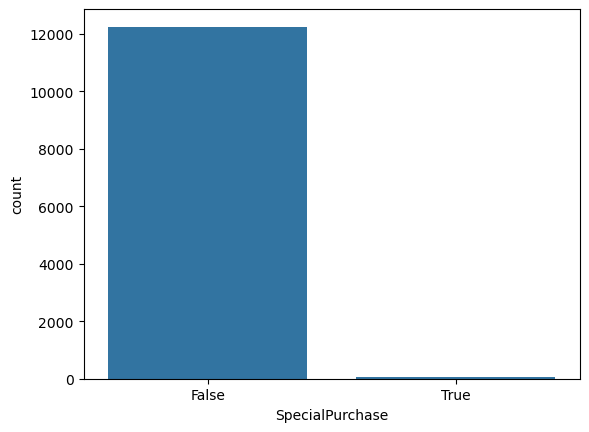

In [336]:
#understand if holidays are a main driver of sales
sns.countplot(x='SpecialPurchase', data=df)